In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# STEP 1 LOADING AND INSPECTION
df=pd.read_csv("insurance.csv")

In [44]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1433,24.0,male,19.500,5,yes,southwest,45255.58000
1434,26.0,female,24.200,4,no,southwest,4181.43000
1435,41.0,female,33.600,5,no,northeast,15486.23000
1436,18.0,male,33.000,1,no,northeast,47619.75000


In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1367 non-null   float64
 1   sex       1367 non-null   object 
 2   bmi       1367 non-null   float64
 3   children  1438 non-null   int64  
 4   smoker    1438 non-null   object 
 5   region    1367 non-null   object 
 6   charges   1438 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 78.8+ KB


In [47]:
df.describe()

,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
df.describe(include="object")

,sex,smoker,region
count,1367,1438,1367
unique,2,2,4
top,male,no,southeast
freq,699,1118,369


In [49]:
# STEP 4 
# age ,sex .bmi,children smoker,region are feature varibale and charges are target varibale

In [50]:
# step 2 
#DATA PROCESSING 
df.isnull().sum()

age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [55]:
#HANDLING MISSING VALUES
df["age"].mean()

np.float64(39.42002781641168)

In [56]:
df["age"].median()

40.0

In [57]:
df["age"]= df["age"].fillna(df["age"].median())

In [58]:
df.isnull().sum()

age          0
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [59]:
df["sex"]= df["sex"].fillna(df["sex"].mode()[0])

In [60]:
df.isnull().sum()

age          0
sex          0
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [61]:
df["bmi"].mean()

np.float64(30.46623994147769)

In [62]:
df["bmi"].median()

30.25

In [63]:
df["bmi"]= df["bmi"].fillna(df["bmi"].median())

In [64]:
df.isnull().sum()


age          0
sex          0
bmi          0
children     0
smoker       0
region      71
charges      0
dtype: int64

In [65]:
df["region"]= df["region"].fillna(df["region"].mode()[0])

In [66]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
# 2.2 FEATURE ENCODING
df= pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,True,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False


In [87]:
# we use one hot coding beacause machine can not identify categorial data one hot coding converted in 0s and 1s
#so that machine can understand it

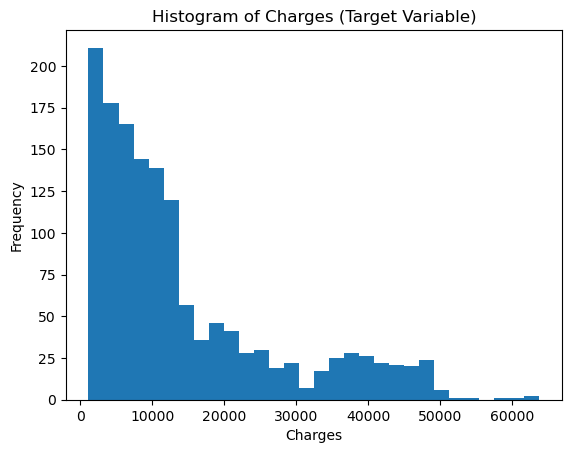

In [88]:
# 3 EXPLORATORY DATA ANALYSIS
plt.hist(df["charges"], bins=30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Charges (Target Variable)")
plt.show()

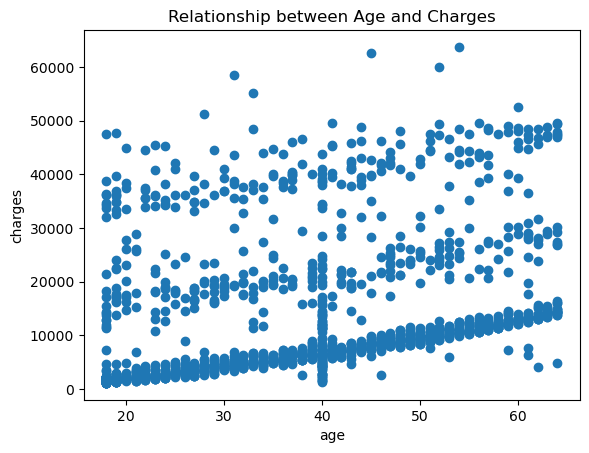

In [89]:
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Relationship between Age and Charges")
plt.show()

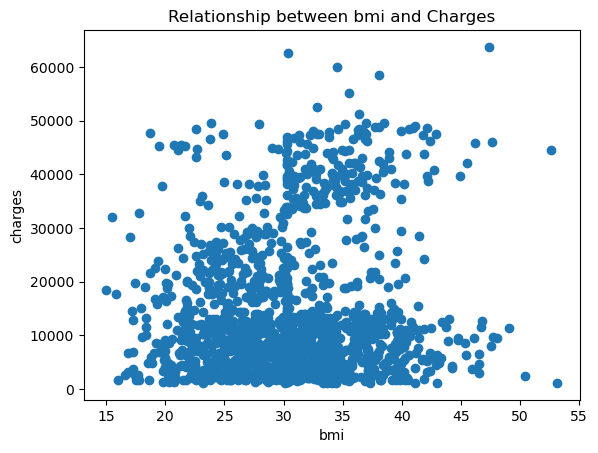

In [90]:
plt.scatter(df["bmi"], df["charges"])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("Relationship between bmi and Charges")
plt.show()

In [92]:
# graph between smoker and charges

In [93]:
numeric_df = df.select_dtypes(include=[np.number])
#calculate the correlation matrix
corr_matrix = numeric_df.corr()

In [94]:
corr_matrix

,age,bmi,children,charges
age,1.000000,0.070633,0.046253,0.274664
bmi,0.070633,1.000000,-0.011242,0.120012
children,0.046253,-0.011242,1.000000,0.146808
charges,0.274664,0.120012,0.146808,1.000000


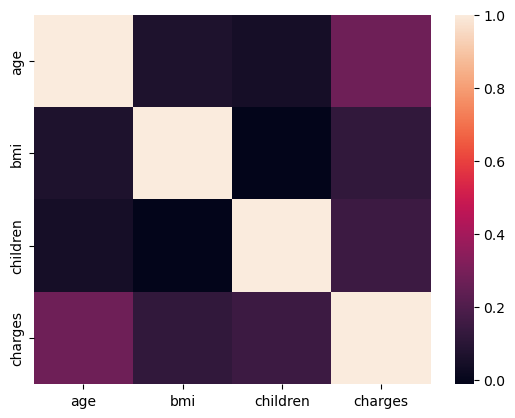

In [95]:
sns.heatmap(corr_matrix)
plt.show()

In [98]:
# two insight obtain from analysis

In [102]:
# identify target and feature variables from  setp 1(4)
X=df.drop(columns=["charges"])
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,True,True,False,False,True
1,18.0,33.770,1,True,False,False,True,False
2,28.0,33.000,3,True,False,False,True,False
3,33.0,22.705,0,True,False,True,False,False
4,32.0,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1433,24.0,19.500,5,True,True,False,False,True
1434,26.0,24.200,4,False,False,False,False,True
1435,41.0,33.600,5,False,False,False,False,False
1436,18.0,33.000,1,True,False,False,False,False


In [103]:
y=df["charges"]


In [104]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1433    45255.58000
1434     4181.43000
1435    15486.23000
1436    47619.75000
1437    44732.66000
Name: charges, Length: 1438, dtype: float64

In [106]:
# step 4 MODEL BUILDING
# DATA SPLITTING
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,   # 20% test data
    train_size=0.80,  # 80% training data (optional)
    random_state=42
)

In [107]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
538,46.0,28.050,1,False,False,False,True,False
174,24.0,33.345,0,False,False,True,False,False
1390,24.0,23.700,0,False,True,False,False,True
303,28.0,33.000,2,False,False,False,True,False
1128,34.0,32.800,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...
1095,18.0,31.350,4,False,False,False,False,False
1130,39.0,23.870,5,False,False,False,True,False
1294,58.0,25.175,0,True,False,False,False,False
860,37.0,47.600,2,False,True,False,False,True


In [108]:
y_train

538      8233.09750
174      2855.43755
1390    19965.00000
303      4349.46200
1128    14358.36437
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1150, dtype: float64

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model=LinearRegression()

In [111]:
model

LinearRegression()

In [112]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred=model.predict(X_test)

In [115]:
y_pred

array([ 6173.29805329, 16080.7219222 ,  7985.16252641,  2643.21528927,
       14785.59834164,  3465.42853953, 12653.9249313 , 30694.54749542,
        5458.56010287,  6708.47818825,  7576.16111497, 10930.16095394,
       31080.52771709, 11286.27631811, 13791.16419524, 10437.54599476,
        5216.54582729,  8913.3861738 ,  9241.36258019, 13338.85369548,
        7370.03137175,  6939.34380335, 11924.80281237, 32158.34628678,
       11554.22516453,  2238.98878534, 12440.30500778,  9742.23286986,
       12454.03687988, 14789.72395352, 27575.15863472,  4224.9213313 ,
       10238.94013186, 13998.25751513,  8636.05864978,  4973.21014195,
       32535.32088911,  2519.44605902,  7457.66006499,  7451.5376543 ,
       12274.57320869, 11053.87313156,  8346.2572801 , 10691.31440788,
       12480.28344302, 34196.90217222, 27569.28130496,  7751.05871101,
        8500.10445542,  8847.43842909,  9598.77144258,  6576.64348639,
       11999.26545165, 11529.83996015,  6204.87511597,  3873.39498547,
      

In [116]:
pd.DataFrame({"Y_test:":y_test,"y_pred:":y_pred})

,Y_test:,y_pred:
51,3579.82870,6173.298053
1322,12981.34570,16080.721922
923,4320.41085,7985.162526
1302,3208.78700,2643.215289
701,9541.69555,14785.598342
...,...,...
471,2203.47185,3454.405657
1384,5492.62000,29398.142710
221,10564.88450,12840.164758
113,2404.73380,4464.879642


In [121]:
#STEP 5 MODEL EVALUATION
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("mean squraed erro:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))
print("root mean squraed erro:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("mean absolute erro:",mean_absolute_error(y_test,y_pred))

mean squraed erro: 64124102.051929355
r2_score: 0.6534854893901869
root mean squraed erro: 8007.752621799037
mean absolute erro: 5516.143547172716


In [123]:
#FROM PART 4
#y=mx+c
#coefficient= m
model.coef_

array([  247.22601361,   233.76351667,  1098.49208041,   284.1371731 ,
       21177.75163382, -1041.44856673,  -573.01455474, -1462.7573859 ])

In [124]:
# intercept value which is c
model.intercept_

np.float64(-8035.450892193334)